## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.metrics as sk
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
def generateData(dataSize):
    x=[i for i in range (dataSize+1)]
    y=[0]*(dataSize+1)
    a=-2
    b=1
    for j in range(len(x)):
        y[j]=a*x[j]+b
    return x,y


In [3]:
lenx=20
x,y=generateData(lenx)
print("x values is :",x)
print("y values is :",y)

x values is : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y values is : [1, -1, -3, -5, -7, -9, -11, -13, -15, -17, -19, -21, -23, -25, -27, -29, -31, -33, -35, -37, -39]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [137]:
class GradientDescent:
    def __init__(self,x,y,alpha,batchSize=len(x),maxIter=5000,Gama=0.9):
        self.x=np.array(x)
        self.y=np.array(y)
        self.alpha=alpha
        self.Gama=Gama
        self.maxIter=maxIter
        self.batchSize=batchSize
        self.theta0=random.randrange(1,5)
        self.theta1=random.randrange(1,5)
        self.convCheck0,convCheck1=1,1
        self.theta0Draw=[]
        self.theta1Draw=[]
        self.losDraw=[]
        self.iterCounter=0
        self.y_predictd=[]

#if mini-batch is selected this method is used to create bateches of the total data set 
    def createBatches(self):
        batchesx=list()
        batchesy=list()
        number_of_miniBatchs=int(len(self.x)/self.batchSize)
        batchesx=np.array_split(self.x,number_of_miniBatchs)
        batchesy=np.array_split(self.y,number_of_miniBatchs)
        return batchesx,batchesy
    
    def stopCriteria(self):
        if (self.iterCounter== self.maxIter):
            print("stopped by maxiteration reached")
            return True
        elif self.convCheck0<0.0001 and self.convCheck1<0.0001:
            print("stopped by convergence test the model stops convergence")
            return True
        else:
            return False
    def caclnorm(self,c,h):
        sq=np.square(c)+np.square(h)
        return np.sqrt(sq)
    
    def caclR2Score(self,t,u):
        score=sk.r2_score(t,u)
        print("the R2Score is : ",score)
        
    def plotout(self,a,s,xlbl,ylbl,mx):
        plt.plot(a[:mx],s[:mx])
        plt.xlabel(xlbl)
        plt.ylabel(ylbl)
        
    def plotRegression(selfa,X,y_actual,y_predictd):
        plt.scatter(X,y_actual, color='black')
        if type(y_predictd)==list:
            for i in range(0,len(y_predictd)):
                plt.plot(X,y_predictd[i])
        else:
            plt.plot(X,y_predictd)

        plt.gca().set_title("Gradient Descent Linear regression")
        
    def generalizedGradientDescent(self):
        gradient_theta0=1
        gradient_theta1=1
        cost=1000
        batchesx,batchesy=self.createBatches()
        while self.caclnorm(gradient_theta0,gradient_theta1)>=0.000001:
            temp_arr=[]
            if (self.stopCriteria()):
                break
            for i in range(len(batchesx)):
                x=batchesx[i]
                y_actual=batchesy[i]
                y_pred=self.theta0+x.dot(self.theta1)
                loss = np.square(y_pred-y_actual)
                cost = np.sum(loss)/(len(x))
                self.losDraw.append(cost)
                gradient_theta0=(self.alpha/len(x))*np.sum((y_pred-y_actual))
                gradient_theta1=(self.alpha/len(x))*np.sum(np.dot((y_pred-y_actual),x))
                temp0=self.theta0
                temp1=self.theta1
                self.theta0Draw.append(temp0)
                self.theta1Draw.append(temp1)
                self.theta0=self.theta0-gradient_theta0
                self.theta1=self.theta1-gradient_theta1
                self.convCheck0=abs(temp0-self.theta0)
                self.convCheck1=abs(temp1-self.theta1)
                self.iterCounter+=1
                if (len(batchesx)>1):
                    temp_arr.append(y_pred)
                else:
                    temp_arr.append(y_pred)
                    self.y_predictd.append(y_pred)
            if len(temp_arr)>1:
                arr=np.array(temp_arr)
                self.y_predictd.append(arr.flatten())
        return self.theta0,self.theta1,cost,self.y_predictd[-1],self.y_predictd,self.losDraw,self.iterCounter,self.theta0Draw,self.theta1Draw

#### Try your function with any input parameterss of your choice.

In [89]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.001
#Create Generic Gradient descent object
GD=GradientDescent(x,y,alpha)
outputs=GD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [90]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

#### Calculate r2 score

In [91]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9997431420381243


#### Plot loss vs. epochs

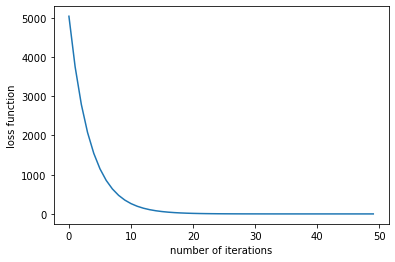

In [92]:
iterr=[i for i in range(iterCounter)]
GD.plotout(iterr,losDraw,"number of iterations","loss function",50)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

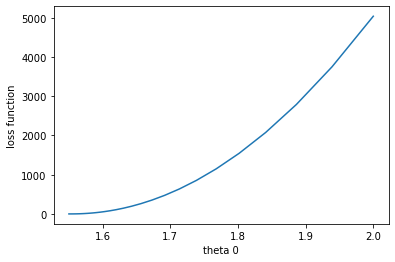

In [93]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",50)

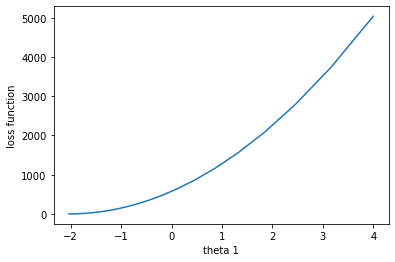

In [94]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",50)

#### Plot all regression lines till converge

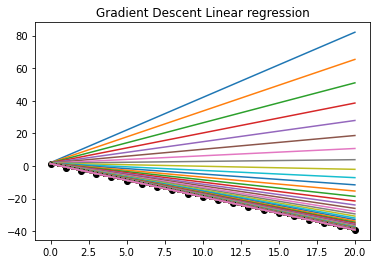

In [95]:
GD.plotRegression(x,y,All_y_predictd)

#### Plot the best regression line

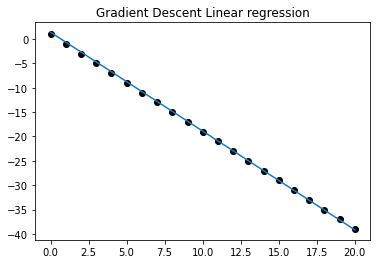

In [96]:
GD.plotRegression(x,y,Final_y_predictd)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

## larger learn rate 0.01

In [17]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.01
#Create Generic Gradient descent object
GD=GradientDescent(x,y,alpha)
outputs=GD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [18]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [19]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999974363338827


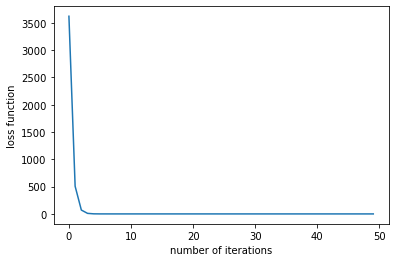

In [20]:
iterr=[i for i in range(iterCounter)]
GD.plotout(iterr,losDraw,"number of iterations","loss function",50)

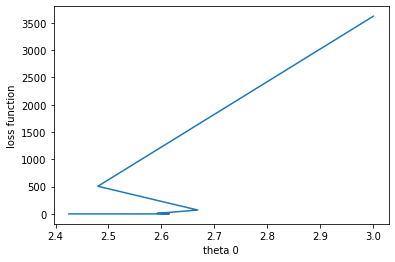

In [21]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",50)

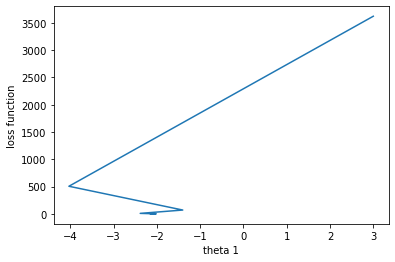

In [22]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",50)

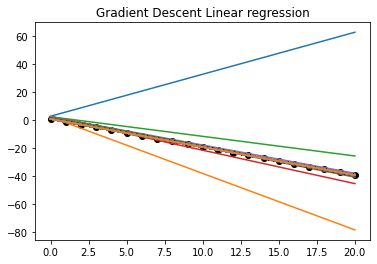

In [23]:
GD.plotRegression(x,y,All_y_predictd)

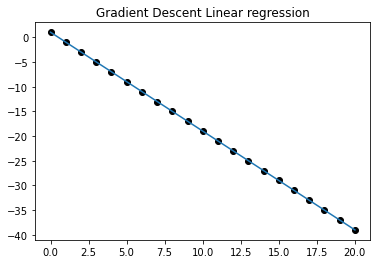

In [24]:
GD.plotRegression(x,y,Final_y_predictd)

## smaller Learning Rate 0.00001

In [25]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.00001
#Create Generic Gradient descent object
GD=GradientDescent(x,y,alpha)
outputs=GD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [26]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [27]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9819166206201387


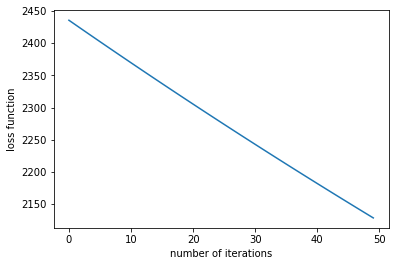

In [28]:
iterr=[i for i in range(iterCounter)]
GD.plotout(iterr,losDraw,"number of iterations","loss function",50)

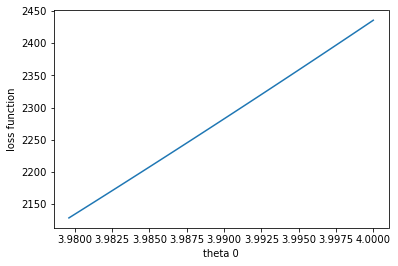

In [29]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",50)

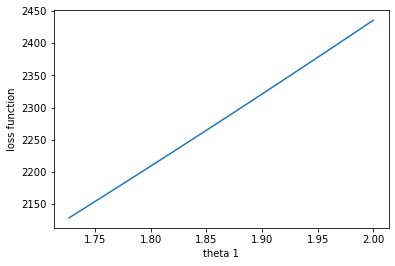

In [30]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",50)

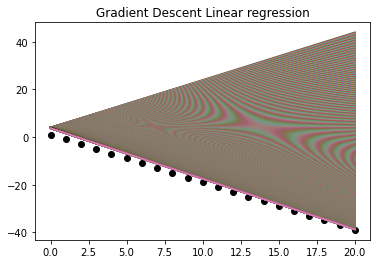

In [31]:
GD.plotRegression(x,y,All_y_predictd)

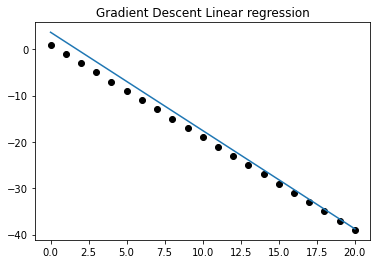

In [32]:
GD.plotRegression(x,y,Final_y_predictd)

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [185]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.0001
batch=7  #the model is generalize so if want stochastic make batch size 1 takes only one observation at a time
#Create Generic Gradient descent object
SGD=GradientDescent(x,y,alpha,batchSize=batch)
outputs=SGD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [186]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [187]:
SGD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9993196809322578


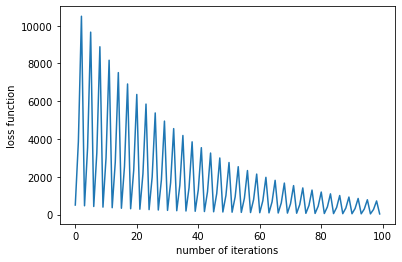

In [188]:
iterr=[i for i in range(iterCounter)]
SGD.plotout(iterr,losDraw,"number of iterations","loss function",100)

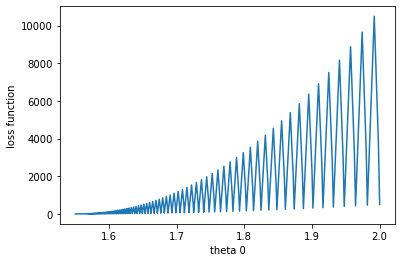

In [189]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",500)

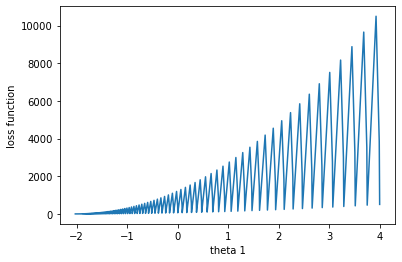

In [190]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",550)

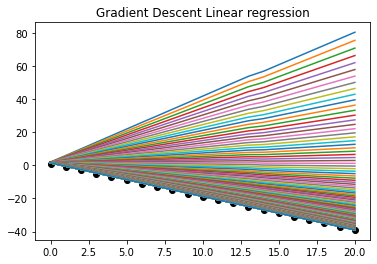

In [191]:
GD.plotRegression(x,y,All_y_predictd)

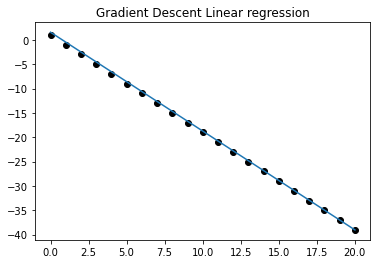

In [192]:
GD.plotRegression(x,y,Final_y_predictd)

## smaller batch size =3

In [177]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.00001
batch=3  #the model is generalize so if want stochastic make batch size 1 takes only one observation at a time
#Create Generic Gradient descent object
SGD=GradientDescent(x,y,alpha,batchSize=batch)
outputs=SGD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [178]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [179]:
SGD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9923516201699465


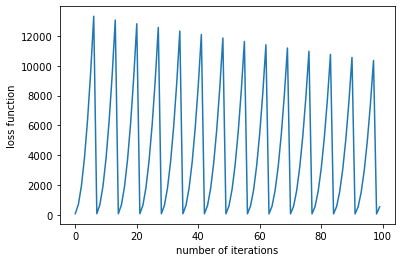

In [180]:
iterr=[i for i in range(iterCounter)]
SGD.plotout(iterr,losDraw,"number of iterations","loss function",100)

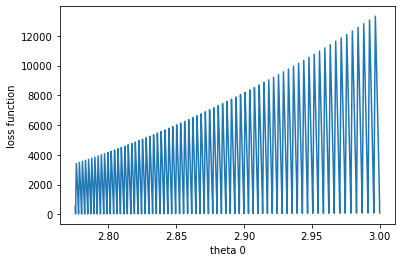

In [181]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",500)

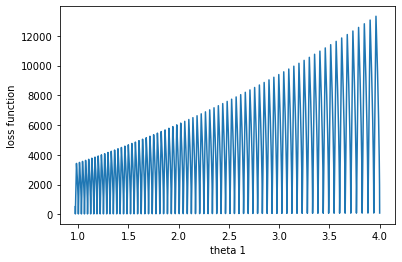

In [182]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",500)

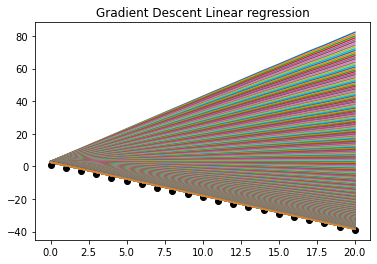

In [183]:
GD.plotRegression(x,y,All_y_predictd)

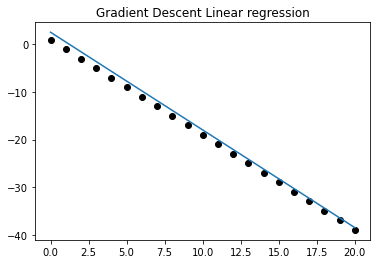

In [184]:
GD.plotRegression(x,y,Final_y_predictd)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [169]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.0001
batch=1  #the model is generalize so if want stochastic make batch size 1 takes only one observation at a time
#Create Generic Gradient descent object
SGD=GradientDescent(x,y,alpha,batchSize=batch)
outputs=SGD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [170]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [171]:
SGD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999761745844009


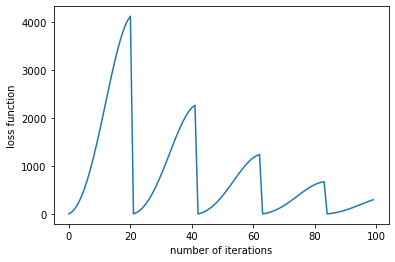

In [172]:
iterr=[i for i in range(iterCounter)]
SGD.plotout(iterr,losDraw,"number of iterations","loss function",100)

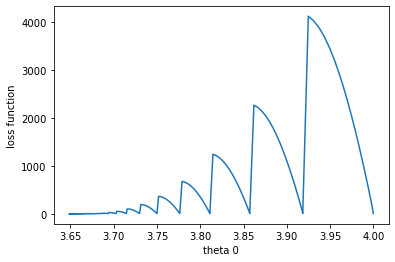

In [173]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",500)

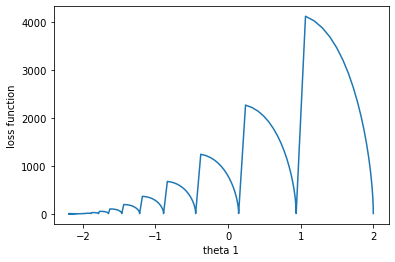

In [174]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 1","loss function",500)

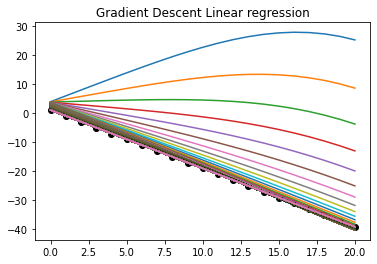

In [175]:
GD.plotRegression(x,y,All_y_predictd)

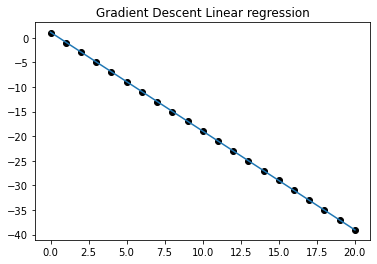

In [176]:
GD.plotRegression(x,y,Final_y_predictd)